In [1]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df = df.sample(10000)
df


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
74953,74953,96905,Male,Loyal Customer,49,Personal Travel,Eco,972,2,5,...,5,4,4,5,4,4,5,0,0.0,neutral or dissatisfied
51489,51489,104137,Female,Loyal Customer,42,Personal Travel,Eco,393,3,5,...,3,3,3,5,5,3,4,0,0.0,neutral or dissatisfied
82289,82289,36863,Male,Loyal Customer,36,Business travel,Business,3228,4,4,...,4,4,4,3,4,2,4,176,175.0,neutral or dissatisfied
102474,102474,11850,Female,Loyal Customer,53,Business travel,Business,3917,2,2,...,4,4,4,4,5,4,4,30,35.0,satisfied
79771,79771,54656,Female,disloyal Customer,10,Business travel,Eco,787,4,4,...,2,4,2,3,4,3,2,21,12.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,26299,26231,Male,Loyal Customer,10,Personal Travel,Eco,270,2,0,...,3,3,5,1,1,4,3,24,26.0,neutral or dissatisfied
45034,45034,71085,Female,Loyal Customer,69,Personal Travel,Eco,802,3,4,...,5,5,3,5,1,5,3,21,17.0,neutral or dissatisfied
53836,53836,74021,Female,Loyal Customer,24,Business travel,Business,1471,3,1,...,3,2,3,3,1,3,3,0,17.0,neutral or dissatisfied
21332,21332,55216,Female,Loyal Customer,52,Business travel,Business,1662,1,1,...,5,5,5,5,3,5,4,0,0.0,satisfied


In [4]:
def data_explore(df):
    if df is None or df.empty:
        print("The DataFrame is empty or not defined.")
        return
    
    print("----- Data Overview -----")
    print(f"Shape of DataFrame: {df.shape}")
    print("Columns:", list(df.columns))
    
    print("\n----- Head of the DataFrame -----")
    print(df.head())
    
    print("\n----- Data Types -----")
    print(df.dtypes)
    
    print("\n----- Missing Values -----")
    print(df.isnull().sum())
    
    print("\n----- Summary Statistics -----")
    print(df.describe(include='all'))
    
    print("\n----- Unique Values per Column -----")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")


In [5]:
data_explore(df)


----- Data Overview -----
Shape of DataFrame: (10000, 25)
Columns: ['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']

----- Head of the DataFrame -----
        Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
74953        74953   96905    Male     Loyal Customer   49  Personal Travel   
51489        51489  104137  Female     Loyal Customer   42  Personal Travel   
82289        82289   36863    Male     Loyal Customer   36  Business travel   
102474      102474   11850  Female     Loyal Customer   53  Business travel   
79771        79771   54656  Fe

In [6]:
df.drop(['Unnamed: 0','id'], axis=1, inplace=True)

In [7]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  5
********************************************************************************
Categorical variables column name: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [8]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  18
********************************************************************************
Numerical Variables Column:  ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


# VISUALIZATION AND INSIGHTS FROM DATA

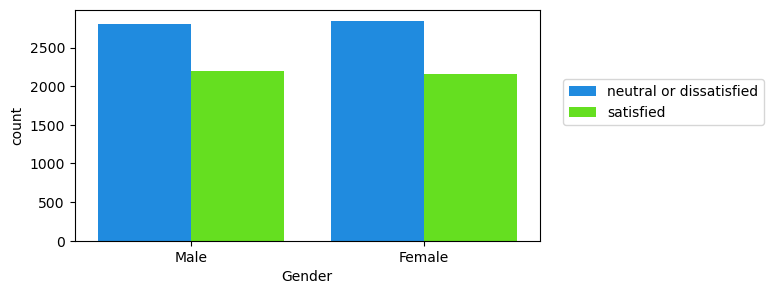

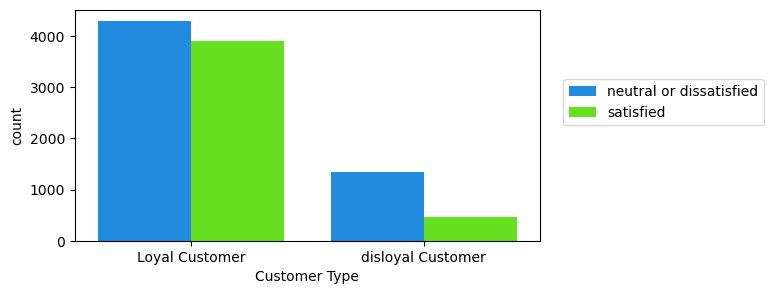

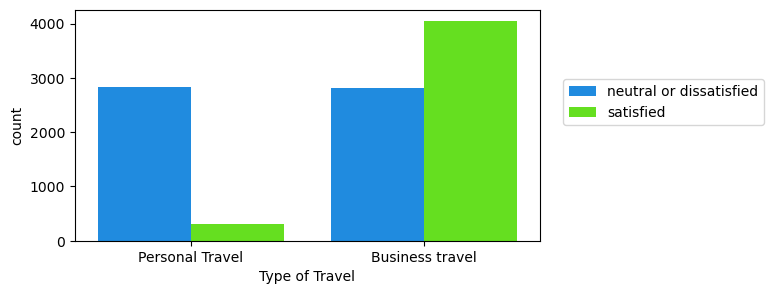

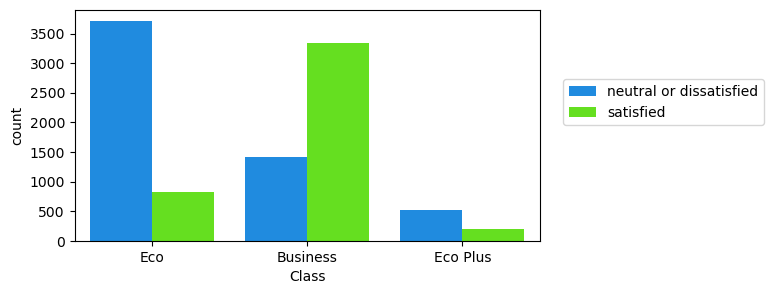

In [9]:
for col in cat_features[:-1]:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=df,x=col,hue ='satisfaction',palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))

In [10]:
def get_insights(data):
    for cols in cat_features[:-1]:
        cat_group = data.groupby(cols)['satisfaction'].describe()
        percent = 100 *(cat_group['freq']/cat_group['count'])
        print('*'*70)
        print("Insights from '{}' data".format(cols))
        print('*'*70)
        for i in range(0,(len(cat_group))):
            print('{} from {} are {}'.format(round(percent[i],2),percent.index[i], cat_group['top'][i]))
        print('*'*70)

In [11]:
get_insights(df)

**********************************************************************
Insights from 'Gender' data
**********************************************************************
56.94 from Female are neutral or dissatisfied
56.02 from Male are neutral or dissatisfied
**********************************************************************
**********************************************************************
Insights from 'Customer Type' data
**********************************************************************
52.47 from Loyal Customer are neutral or dissatisfied
74.71 from disloyal Customer are neutral or dissatisfied
**********************************************************************
**********************************************************************
Insights from 'Type of Travel' data
**********************************************************************
59.05 from Business travel are satisfied
90.47 from Personal Travel are neutral or dissatisfied
************************************

C:\Users\User\AppData\Local\Temp\ipykernel_11428\3454265544.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('{} from {} are {}'.format(round(percent[i],2),percent.index[i], cat_group['top'][i]))
C:\Users\User\AppData\Local\Temp\ipykernel_11428\3454265544.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('{} from {} are {}'.format(round(percent[i],2),percent.index[i], cat_group['top'][i]))
C:\Users\User\AppData\Local\Temp\ipykernel_11428\3454265544.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (cons

# Visualizing Numerical Features

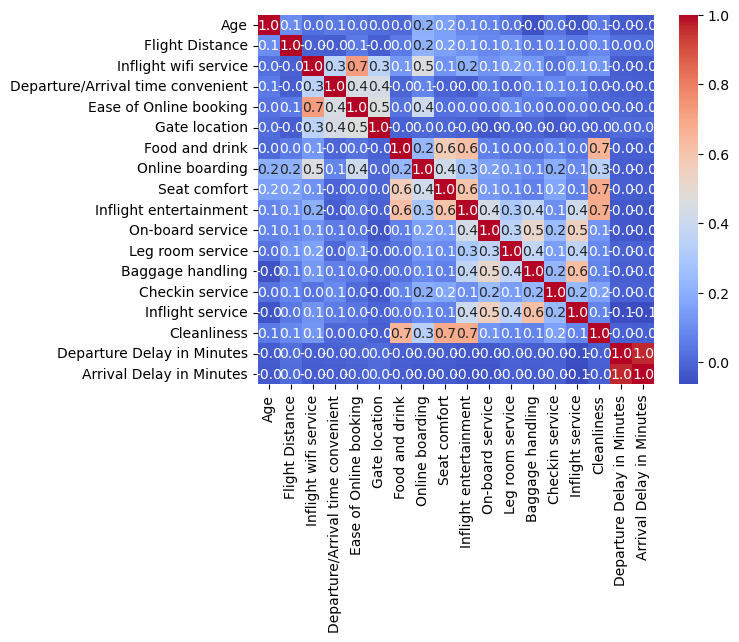

In [12]:
#Creating a heatmap of the correlation values
sns.heatmap(df. corr(numeric_only=True),annot=True,fmt='.1f',cmap='coolwarm')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11428\2599476579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='satisfaction',y=col,palette='gist_rainbow_r')
C:\Users\User\AppData\Local\Temp\ipykernel_11428\2599476579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='satisfaction',y=col,palette='gist_rainbow_r')
C:\Users\User\AppData\Local\Temp\ipykernel_11428\2599476579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='satisfaction',y=col,palette='gist_rainbow_r')
C:\Users\User\AppData\Local\Temp\ipykern

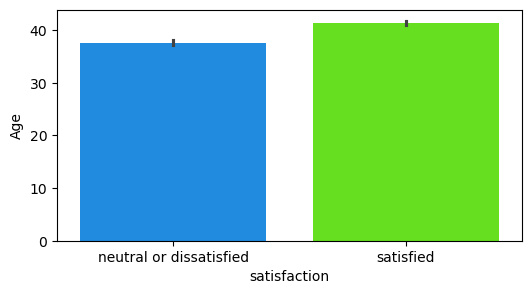

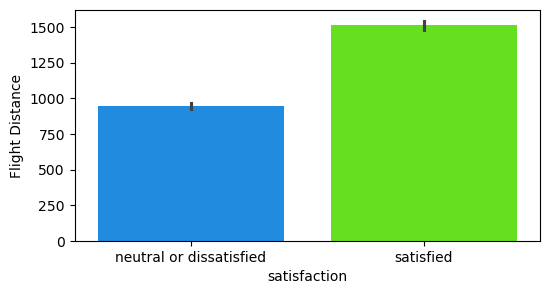

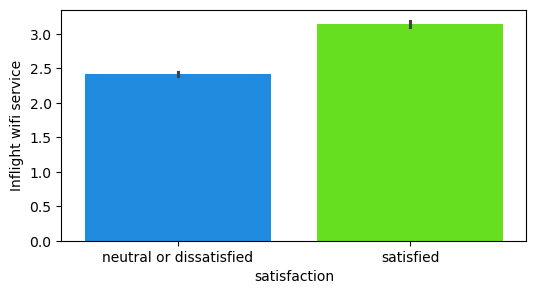

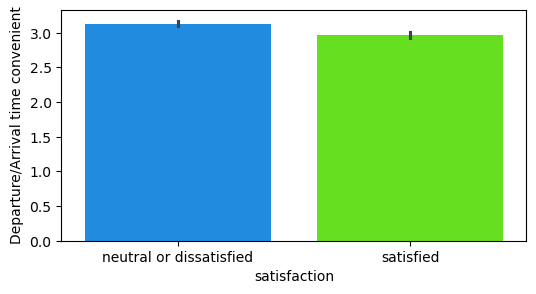

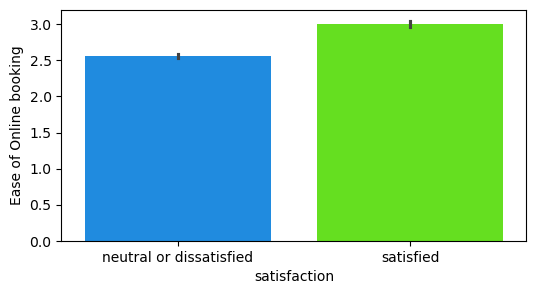

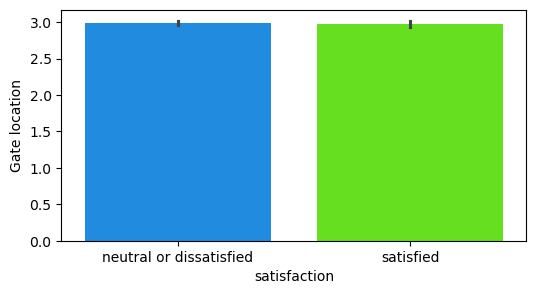

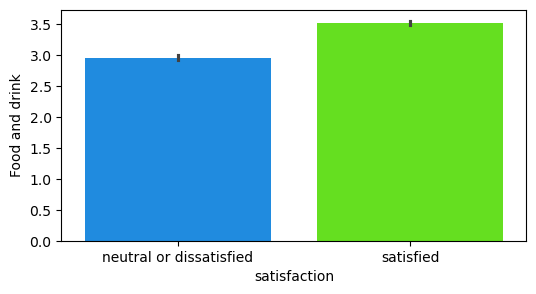

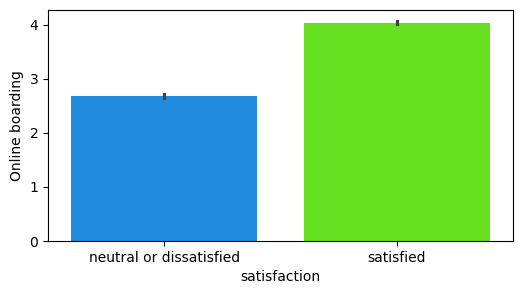

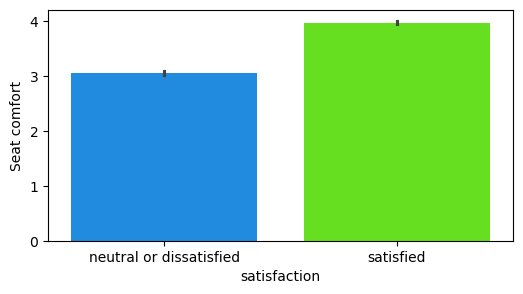

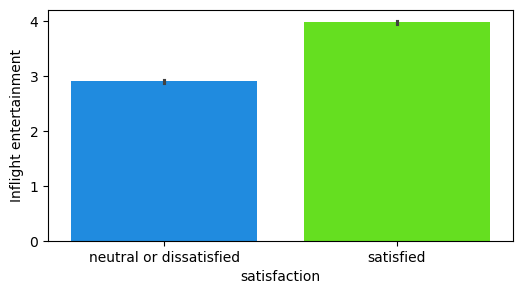

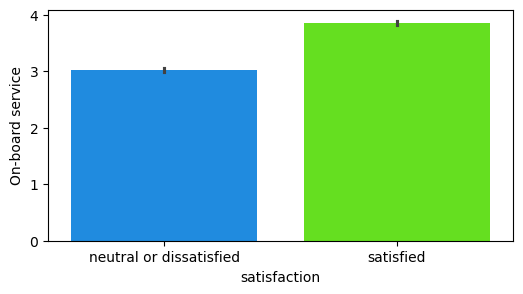

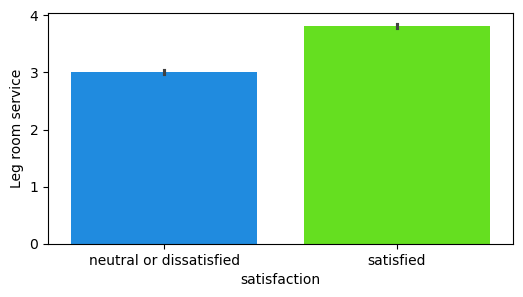

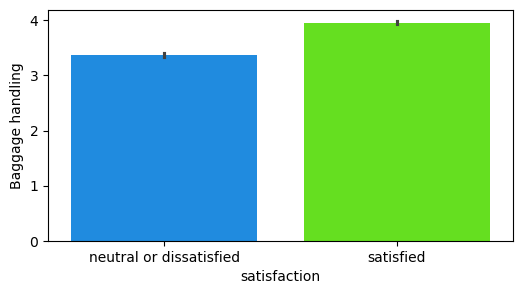

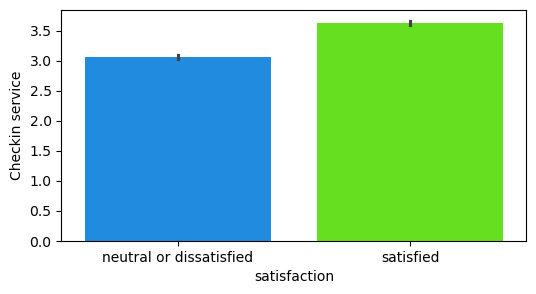

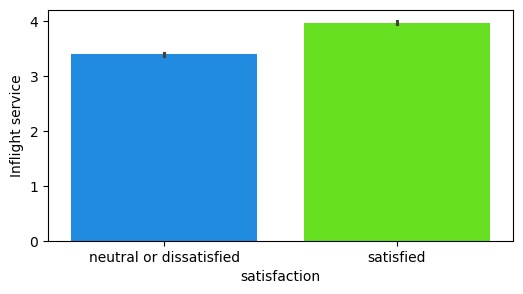

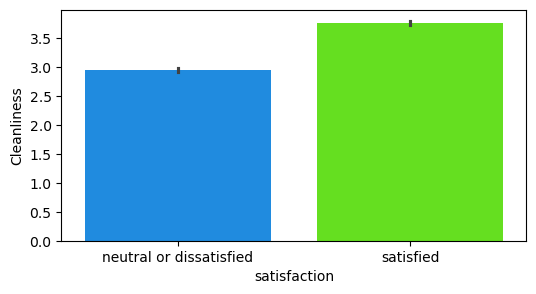

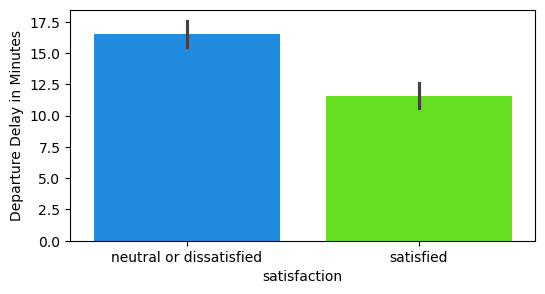

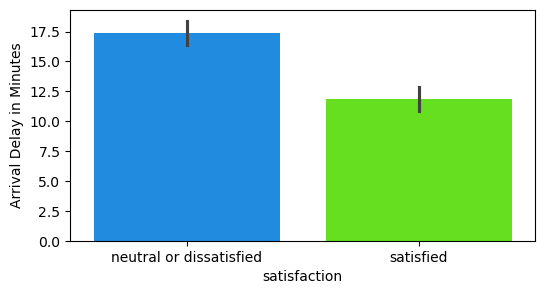

In [13]:
#Plotting the barplot of numerical features
for col in numerical_features:
    plt.figure(figsize=(6,3), dpi=100)
    sns.barplot(data=df,x='satisfaction',y=col,palette='gist_rainbow_r')

In [14]:
#Dropping age, gender and gate location
df.drop(['Age','Gender','Gate location'], axis=1, inplace=True)

In [15]:
df.groupby('satisfaction')['Arrival Delay in Minutes'].mean()

satisfaction
neutral or dissatisfied    17.371957
satisfied                  11.872727
Name: Arrival Delay in Minutes, dtype: float64

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

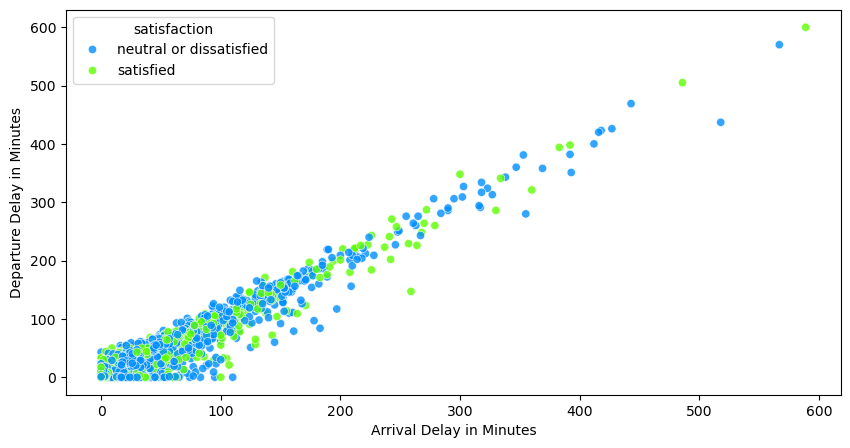

In [16]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df,x='Arrival Delay in Minutes',y='Departure Delay in Minutes',hue='satisfaction',palette='gist_rainbow_r', alpha=0.8)

(0.0, 1000.0)

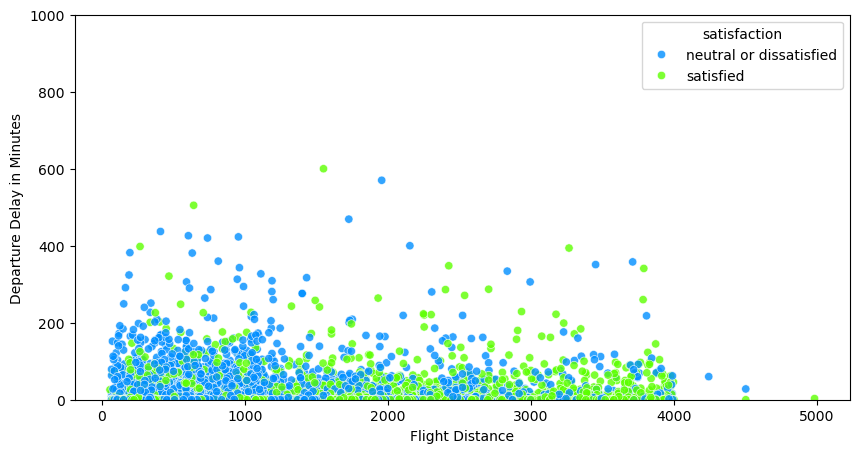

In [17]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df,x='Flight Distance',y='Departure Delay in Minutes',hue='satisfaction',palette='gist_rainbow_r', alpha=0.8)
plt.ylim(0,1000)

In [18]:
df.columns = df.columns.str.strip()


In [19]:
print(repr(df.columns))


Index(['Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'satisfaction'],
      dtype='object')


In [20]:
df.rename(columns=lambda x: x.strip(), inplace=True)  # To clean all columns


In [21]:
df.rename(columns={'Class ': 'Class'}, inplace=True)  # Renaming with any extra spaces


In [22]:
print(df.dtypes)


Customer Type                         object
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfaction                          object
dtype: object


In [23]:
print(df.head())


            Customer Type   Type of Travel     Class  Flight Distance  \
74953      Loyal Customer  Personal Travel       Eco              972   
51489      Loyal Customer  Personal Travel       Eco              393   
82289      Loyal Customer  Business travel  Business             3228   
102474     Loyal Customer  Business travel  Business             3917   
79771   disloyal Customer  Business travel       Eco              787   

        Inflight wifi service  Departure/Arrival time convenient  \
74953                       2                                  5   
51489                       3                                  5   
82289                       4                                  4   
102474                      2                                  2   
79771                       4                                  4   

        Ease of Online booking  Food and drink  Online boarding  Seat comfort  \
74953                        2               5                2        

In [25]:
df.groupby('Class').mean(numeric_only=True)


,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Class,,,,,,,,,,,,,,,,
Business,1673.740071,2.763606,2.890523,2.906703,3.319815,3.741752,3.783358,3.641521,3.678714,3.646354,3.831267,3.527001,3.843455,3.502837,13.841563,14.324142
Eco,757.674747,2.682459,3.232261,2.614808,3.067431,2.819524,3.138387,3.113045,3.135963,3.117673,3.464081,3.119877,3.483693,3.110401,14.324592,14.946448
Eco Plus,764.879090,2.819346,3.126600,2.618777,3.203414,2.934566,3.220484,3.186344,3.005690,3.021337,3.285917,3.051209,3.317212,3.201991,18.223329,19.575499


# MISSING VALUES

In [26]:
#Creating a copy of the dataset, before we delete the NA values and substitute
df_copy=df.copy()

In [27]:
df_clean = df.dropna(subset=['Arrival Delay in Minutes'])


In [28]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mode()[0])
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(method='ffill')  # Forward fill
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(method='bfill')  # Backward fill
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].interpolate()


C:\Users\User\AppData\Local\Temp\ipykernel_11428\1714456538.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(method='ffill')  # Forward fill
C:\Users\User\AppData\Local\Temp\ipykernel_11428\1714456538.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(method='bfill')  # Backward fill


In [29]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df['Arrival Delay in Minutes'] = imputer.fit_transform(df[['Arrival Delay in Minutes']])


In [30]:
df.isna().sum()

Customer Type                        0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

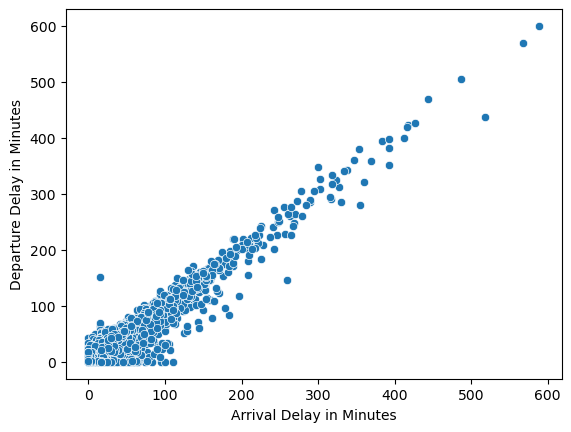

In [32]:
df_na = df.dropna()
sns.scatterplot(data=df_na, x='Arrival Delay in Minutes', y='Departure Delay in Minutes')


# MAPPING THE CATEGORICAL VARIABLES

In [33]:
#Mapping the values
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})

In [34]:
#Transforming the dataframe with mapped values
df=pd.get_dummies(df)

In [35]:
#Checking the data
df.head()

,Customer Type,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
74953,1,0,972,2,5,2,5,2,5,5,...,5,4,4,5,0,0.0,0,False,True,False
51489,1,0,393,3,5,3,4,5,4,3,...,5,5,3,4,0,0.0,0,False,True,False
82289,1,1,3228,4,4,4,4,4,4,4,...,3,4,2,4,176,175.0,0,True,False,False
102474,1,1,3917,2,2,2,2,5,4,4,...,4,5,4,4,30,35.0,1,True,False,False
79771,0,1,787,4,4,4,2,4,2,2,...,3,4,3,2,21,12.0,0,False,True,False


# BUILDING THE MODEL

In [36]:
#Preparing X and Y
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [42]:
#Importing our ML toolkit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [43]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
#Scaling the features with pipeline method, and standard scaler
pipeline = Pipeline([
            ('std_scaler',StandardScaler()),
                    ])
scaled_X_train = pipeline.fit_transform(X_train)
scaled_X_test = pipeline.transform(X_test)

In [45]:
kfold = StratifiedKFold(n_splits=10)

C:\Users\User\AppData\Local\Temp\ipykernel_11428\3184088337.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(


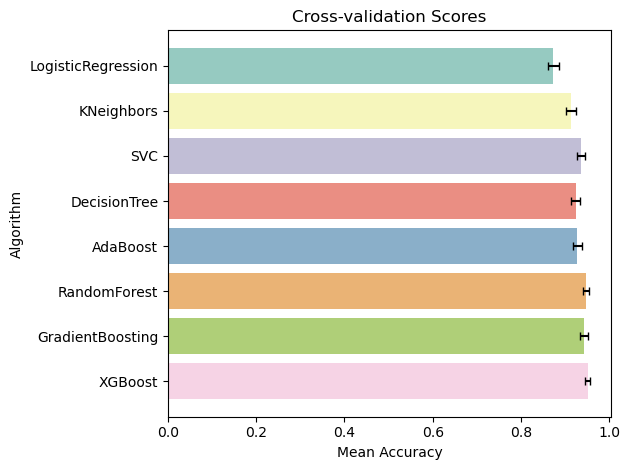

In [48]:
# Modeling step to test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(XGBClassifier(random_state=random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, scaled_X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","KNeighbors","SVC","DecisionTree","AdaBoost",
"RandomForest","GradientBoosting","XGBoost"]})

# Ensure cv_means and cv_std match the length of cv_res
assert len(cv_means) == len(cv_std) == len(cv_res)

# Use sns.barplot with properly matched xerr
g = sns.barplot(
    x="CrossValMeans",
    y="Algorithm",
    data=cv_res,
    palette="Set3",
    orient="h",
    errorbar=None,  # Disable errorbar directly
)

# Add error bars manually using plt.errorbar
plt.errorbar(
    x=cv_res["CrossValMeans"],
    y=range(len(cv_res)),  # Position matches bar positions
    xerr=cv_std,
    fmt="none",  # No points, only error bars
    ecolor="black",
    capsize=3
)

# Set axis labels and title
g.set_xlabel("Mean Accuracy")
g.set_title("Cross-validation Scores")
plt.tight_layout()
plt.show()



In [49]:
#Fitting the model to calculate accuracy
model_xgb = XGBClassifier(random_state =random_state)
model_xgb.fit(scaled_X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [50]:
#Predicting and calculating accuracy score
pred_xgb = model_xgb.predict(scaled_X_test)
accuracy_score(y_test,pred_xgb)

0.957

In [53]:
from sklearn.metrics import confusion_matrix

# Step 1: Make predictions
y_pred = model_xgb.predict(scaled_X_test)

# Step 2: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# (Optional) Display the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[1098   40]
 [  46  816]]


In [54]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1138
           1       0.95      0.95      0.95       862

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



## Now, let us plot the feature importances, and let us visualize it

Text(0.5, 1.0, 'Feature Importance')

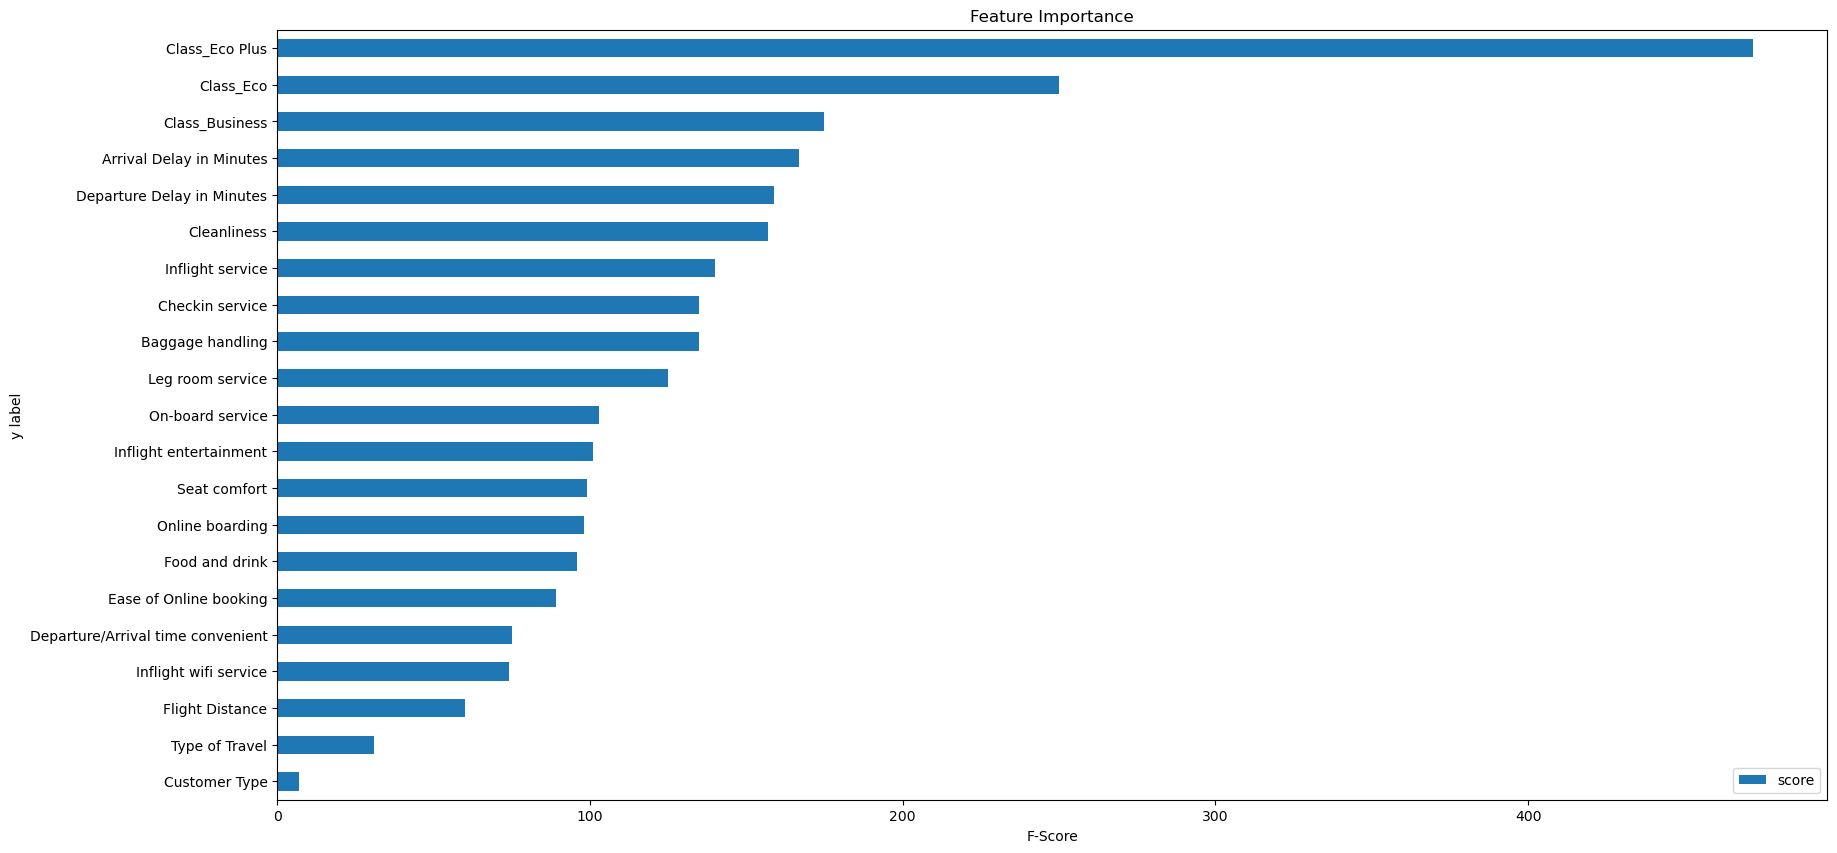

In [55]:
orig_feature_names = X_train.columns
feature_important = model_xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score")#, ascending=False)
ax =data.plot(kind='barh', figsize = (20,10))
ax.set_yticklabels(orig_feature_names); ## plot top features
#ax.set_xlabel("F-Score")
ax.set(xlabel="F-Score", ylabel="y label")
ax.set_title('Feature Importance')